In [2]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

Importando os dados:

In [3]:
consuResiPorRegiao = pd.read_csv("../databases/tratado/consumo residencial por regiao/consumo residencial por regiao com total.csv",index_col=[0,1])

Verificando os dados

In [4]:
consuResiPorRegiao.head()

JAN      FEV      MAR      ABR      MAI      JUN  \
ANO  REGIAO                                                               
2004 Centro-Oeste   506540   472103   493181   506071   492808   466359   
     Nordeste      1098664  1000221  1049437  1097251  1033007  1002351   
     Norte          348585   323403   320237   339775   332155   332089   
     Sudeste       3694386  3511541  3629455  3733863  3537269  3433443   
     Sul           1132506  1121970  1108027  1132047  1082103  1056850   

                       JUL      AGO      SET      OUT      NOV      DEZ  \
ANO  REGIAO                                                               
2004 Centro-Oeste   470539   479192   514971   529450   505694   513252   
     Nordeste       969181   962934  1041242  1046249  1083212  1104220   
     Norte          328423   338836   351459   353207   362279   355894   
     Sudeste       3457623  3453322  3596160  3608130  3608515  3569438   
     Sul           1066705  1070192  1100557  1069478  1071490  1100567   

                      total  
ANO  REGIAO                  
2004 Centro-Oeste   5950160  
     Nordeste      12487969  
     Norte          4086342  
     Sudeste       42833145  
     Sul           13112492

# Previsão região norte:

Extraindo o consumo da região norte

In [5]:
slicer = pd.IndexSlice
consumo_mensal_norte=consuResiPorRegiao.loc[slicer[:, "Norte"], "JAN":"DEZ"].reset_index().drop("REGIAO",axis=1)


In [6]:
consumo_mensal_norte

,ANO,JAN,FEV,MAR,ABR,MAI,JUN,JUL,AGO,SET,OUT,NOV,DEZ
0,2004,348585,323403,320237,339775,332155,332089,328423,338836,351459,353207,362279,355894
1,2005,355960,336135,341725,350369,338681,352716,356661,360833,381555,372756,384562,360953
2,2006,352086,343002,344413,348152,345138,355133,369332,372153,397912,397549,402093,380071
3,2007,377018,364503,352883,371967,371605,381288,374013,392888,408304,409738,422501,405279
4,2008,396323,380864,374421,386480,399647,399430,405359,434435,455038,453242,452781,431406
5,2009,437714,400108,393057,413043,406935,411397,429684,453741,475717,472878,484073,478521
6,2010,460383,442546,466995,487028,479188,497484,490071,492103,529944,541500,525898,509429
7,2011,496172,452353,477637,471596,487643,520799,513870,541456,567602,567178,548988,548931
8,2012,524135,503434,503494,532486,552161,566437,551450,592424,604096,608315,628098,597632
9,2013,577517,560166,543558,591995,595852,616782,623393,629182,640168,687065,675367,683978


formatando a data

In [7]:
def trans(mes, ano, dado):
    if mes == "JAN":
        return ["01/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes =="FEV":
        return ["02/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes =="MAR":
        return ["03/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes =="ABR":
        return ["04/" + str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "MAI":
        return ["05/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "JUN":
        return ["06/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "JUL":
        return ["07/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "AGO":
        return ["08/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "SET":
        return ["09/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "OUT":
        return ["10/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "NOV":
        return ["11/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]
    elif mes == "DEZ":
        return ["12/"+str(ano), consumo_mensal_norte[consumo_mensal_norte["ANO"] == ano][mes].iloc[0]]

In [8]:
trans("JAN", 2004, consumo_mensal_norte) #como vai ficar

['01/2004', 348585]

In [9]:
meses = consumo_mensal_norte.columns[1:13]
ano=consumo_mensal_norte["ANO"]
from datetime import datetime
#t={trans(a, b, consumo_mensal_norte) for (a, b) in zip(meses, ano)}

serie = {}
for a in meses:
    for b in ano:
        foo = trans(a, b, consumo_mensal_norte)
        serie[foo[0]] = foo[1]




<Axes: >

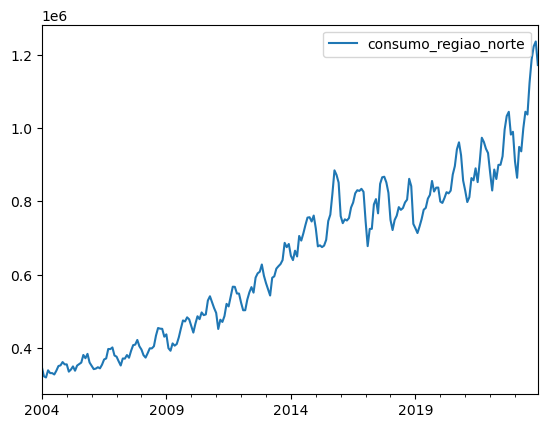

In [10]:
serie=pd.Series(serie, name="consumo_regiao_norte") #transformando a data em indice
consumoNorte=pd.DataFrame(serie)
consumoNorte.index = pd.to_datetime(consumoNorte.index, format="%m/%Y")
consumoNorte.sort_index(inplace=True)
consumoNorte.plot.line()

In [11]:
consumoNorte.head(5)

,consumo_regiao_norte
2004-01-01,348585
2004-02-01,323403
2004-03-01,320237
2004-04-01,339775
2004-05-01,332155


In [42]:
consumoNorte.index.name="data"

In [43]:
consumoNorte.to_csv("../databases/tratado/consumo residencial por regiao/consumo residencial regiao norte.csv")

<Axes: >

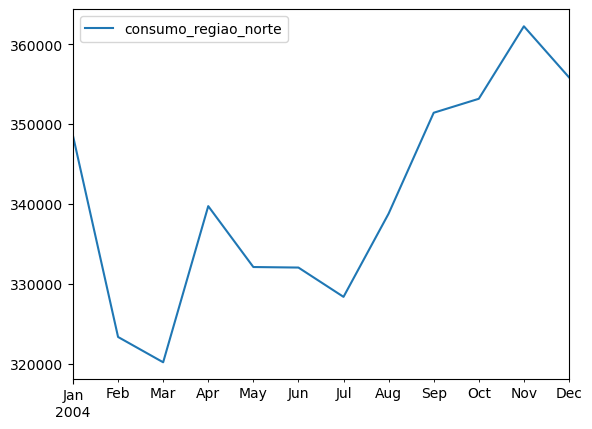

In [14]:
consumoNorte.head(12).plot.line()

## Previsão

In [15]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

confirmando se está em ordem

In [16]:
consumoNorte.head()


,consumo_regiao_norte
2004-01-01,348585
2004-02-01,323403
2004-03-01,320237
2004-04-01,339775
2004-05-01,332155


In [17]:
consumoNorte.tail()

,consumo_regiao_norte
2023-08-01,1123220
2023-09-01,1186719
2023-10-01,1222328
2023-11-01,1235789
2023-12-01,1171554


In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import KFold



Teste inicial

In [19]:
datas = consumoNorte.index #extraindo as features (datas)
datas

DatetimeIndex(['2004-01-01', '2004-02-01', '2004-03-01', '2004-04-01',
               '2004-05-01', '2004-06-01', '2004-07-01', '2004-08-01',
               '2004-09-01', '2004-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=240, freq=None)

In [20]:
consumo=consumoNorte.values.reshape(-1, 1) #extraindo o target (consumo)
consumo

array([[ 348585],
       [ 323403],
       [ 320237],
       [ 339775],
       [ 332155],
       [ 332089],
       [ 328423],
       [ 338836],
       [ 351459],
       [ 353207],
       [ 362279],
       [ 355894],
       [ 355960],
       [ 336135],
       [ 341725],
       [ 350369],
       [ 338681],
       [ 352716],
       [ 356661],
       [ 360833],
       [ 381555],
       [ 372756],
       [ 384562],
       [ 360953],
       [ 352086],
       [ 343002],
       [ 344413],
       [ 348152],
       [ 345138],
       [ 355133],
       [ 369332],
       [ 372153],
       [ 397912],
       [ 397549],
       [ 402093],
       [ 380071],
       [ 377018],
       [ 364503],
       [ 352883],
       [ 371967],
       [ 371605],
       [ 381288],
       [ 374013],
       [ 392888],
       [ 408304],
       [ 409738],
       [ 422501],
       [ 405279],
       [ 396323],
       [ 380864],
       [ 374421],
       [ 386480],
       [ 399647],
       [ 399430],
       [ 405359],
       [ 4

separando em treino e teste

In [21]:
train_size = int(datas.size * .8)
scaler_consumo = MinMaxScaler()
scaled_consumo = scaler_consumo.fit_transform(consumo)
#scaled_consumo = consumo
train_dates, teste_dates = np.array(datas[:train_size]), np.array(datas[train_size:])
train_consumo, teste_consumo = scaled_consumo[:train_size].ravel(), scaled_consumo[train_size:].ravel()

In [22]:
from sklearn.svm import SVR

In [23]:
#params = {"kernel" :( "rbf",), "C" : (1, 10, 100, 1000, 10000, 100000, 1000000), "epsilon" : (1, 0.1, 0.01, 0.001, 0.0001, 
#                                                                                     0.00001, 0.000001)}
#from sklearn.model_selection import GridSearchCV
#regressor = SVR(kernel="rbf")
#grid_search = GridSearchCV(estimator=regressor, param_grid=params, scoring="r2")
#
#grid_search.fit(train_dates.reshape(-1, 1), train_consumo)

In [24]:
#grid_search.best_params_

In [25]:
#grid_search.best_score_

In [26]:
epsilon = 0.00001
epsilon = 0.05
C = 10

In [27]:
svr_model = SVR(kernel="rbf", epsilon=epsilon, C=C)


In [28]:
svr_model.fit(train_dates.reshape(-1, 1), train_consumo)

SVR(C=10, epsilon=0.05)

In [29]:
previsto=svr_model.predict(teste_dates.reshape(-1, 1))

<Axes: xlabel='datas'>

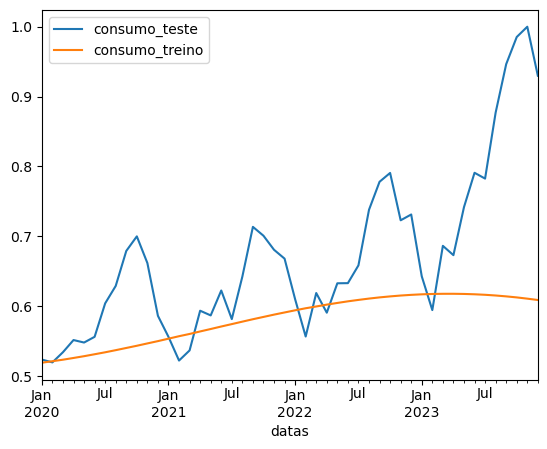

In [30]:
df_teste = pd.DataFrame({"datas":teste_dates.ravel(),"consumo":teste_consumo.ravel()})
df_resultado = pd.DataFrame({"datas":teste_dates.ravel(),"consumo":previsto.ravel()})
total=pd.merge(df_teste, df_resultado, on="datas", suffixes=["_teste", "_treino"])
total.plot(x="datas")
#df_teste.plot(x="datas", y="consumo")
#df_resultado.plot(x="datas", y="consumo")

verificando o desempenho

In [31]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error(scaler_consumo.inverse_transform(teste_consumo.reshape(-1, 1)), 
                    scaler_consumo.inverse_transform(previsto.reshape(-1, 1)))

86692.38033860674

# Cross-validation

In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error
#n = 5
#tss = TimeSeriesSplit(n_splits=n)
#
#modelo = SVR(kernel="rbf", C=C, epsilon=epsilon, max_iter=100000 )
#scaler = StandardScaler()
#y_scaled = scaler.fit_transform(consumoNorte.values)
#x=np.array(consumoNorte.index)
#cross_val_score(modelo, x.reshape(-1, 1), y_scaled.ravel(), cv=tss, scoring="r2").mean()

fazendo uma previsão

In [33]:
teste = np.array(pd.to_datetime(["2024-01-01", "2024-02-01", "2024-03-01", "2024-04-01", "2024-05-01", "2024-06-01"]))
teste_consumo =  np.array(( 908626 ,	 864397 ,	 948603 ,	 936381 ,	 999291 ,	 1044363 	, 
                           1036735 ,	 1123220 ,	 1186719 	, 1222328 ,	 1235789 ,	 1171554))
teste_consumo

array([ 908626,  864397,  948603,  936381,  999291, 1044363, 1036735,
       1123220, 1186719, 1222328, 1235789, 1171554])

In [34]:
modelo_prev = SVR(kernel="rbf", epsilon=epsilon, C=C)

In [35]:
x=np.array(consumoNorte.index)
y=consumoNorte.values

In [36]:
scaler = StandardScaler()
y_scaled = scaler.fit_transform(y)
a=scaler.transform(teste_consumo.reshape(-1, 1))


In [37]:
modelo_prev.fit(x.reshape(-1, 1),y_scaled.ravel())

SVR(C=10, epsilon=0.05)

In [38]:
previsto2=modelo_prev.predict(teste.reshape(-1,1))

In [39]:
previsto2=scaler.inverse_transform(previsto2.reshape(-1, 1))

In [40]:
real = np.array([ 1124302, 1088997,1085332,1117988,1136346,1114577 ])

In [41]:
from sklearn.metrics import r2_score, mean_squared_error
r2_score(real,previsto2)
mean_squared_error(real, previsto2)
mean_absolute_error(real, previsto2)

16177.334423759914